In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

# from feature_engine.selection import DropCorrelatedFeatures


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import  MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [50]:
df = pd.read_hdf('../input/clean-data/clean_data.h5', key='data')

In [51]:
df.head()

,rating,text,title,label,text_length,title_length
0,5.0,product far not disappoint children love use l...,kindl,pos,143,6
1,5.0,great beginn experienc person bought gift love,fast,pos,75,9
2,5.0,inexpens tablet use learn step nabi thrill lea...,beginn tablet year old son,pos,131,39
3,4.0,fire hd two week love tablet great prime membe...,good,pos,593,7
4,5.0,bought grand daughter come visit set user ente...,fantast tablet kid,pos,613,25


In [ ]:
X = df.text + ' ' + df.title

In [ ]:
y= df.label.map({'pos': 1, 'neg': 0})

In [53]:
y.value_counts()

label
1    32310
0     2311
Name: count, dtype: int64

### Vectorization

In [54]:
cv_1 = TfidfVectorizer()
X_1 = cv_1.fit_transform(X)

In [55]:
X_1

<34621x9457 sparse matrix of type '<class 'numpy.float64'>'
	with 520311 stored elements in Compressed Sparse Row format>

In [56]:
cv_2 = TfidfVectorizer(ngram_range=(2,2))
X_2 = cv_2.fit_transform(X)

In [57]:
X_2

<34621x191810 sparse matrix of type '<class 'numpy.float64'>'
	with 554779 stored elements in Compressed Sparse Row format>

In [58]:
vocab = pd.Series(cv_2.vocabulary_)

In [59]:
use_cols = vocab[vocab.index.str.contains('not')].values

In [60]:
X_2 = X_2[:, use_cols]

In [61]:
from scipy.sparse import hstack

In [62]:
X_t = hstack([X_1, X_2])

In [63]:
X_t

<34621x12795 sparse matrix of type '<class 'numpy.float64'>'
	with 535643 stored elements in Compressed Sparse Row format>

### Oversampling

In [64]:
sm = SMOTE(
      sampling_strategy='auto',  # samples only the minority class
      random_state=0,  # for reproducibility
      k_neighbors=5,
      )

X_res, y_res = sm.fit_resample(X_t, y)

In [65]:
y_res.value_counts()

label
1    32310
0    32310
Name: count, dtype: int64

### Train/test split

In [66]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=101, test_size=.25)

In [67]:
y_train.value_counts()

label
0    24235
1    24230
Name: count, dtype: int64

In [68]:
y_test.value_counts()

label
1    8080
0    8075
Name: count, dtype: int64

### Building the Model

#### naive bayes

In [69]:
naive_model = MultinomialNB()
naive_model.fit(X_train, y_train)

MultinomialNB()

In [70]:
accuracy_score(y_train, naive_model.predict(X_train))

0.8945424533168266

In [71]:
accuracy_score(y_test, naive_model.predict(X_test))

0.8812751470133086

In [72]:
print(classification_report(y_test, naive_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      8075
           1       0.89      0.87      0.88      8080

    accuracy                           0.88     16155
   macro avg       0.88      0.88      0.88     16155
weighted avg       0.88      0.88      0.88     16155



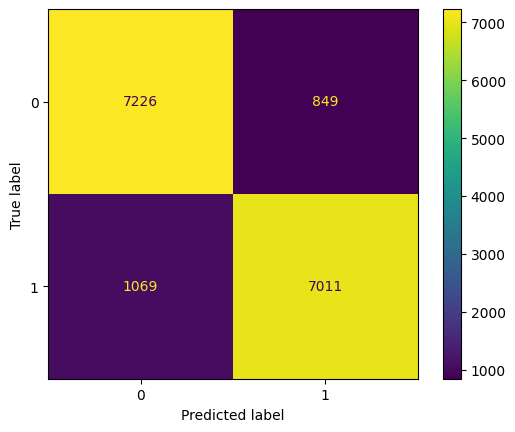

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, naive_model.predict(X_test))

#### Randomforest

In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

In [74]:
accuracy_score(y_train, rfc_model.predict(X_train))

1.0

In [75]:
accuracy_score(y_test, rfc_model.predict(X_test))

0.9761064685855773

In [76]:
print(classification_report(y_test, rfc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8075
           1       0.99      0.96      0.98      8080

    accuracy                           0.98     16155
   macro avg       0.98      0.98      0.98     16155
weighted avg       0.98      0.98      0.98     16155



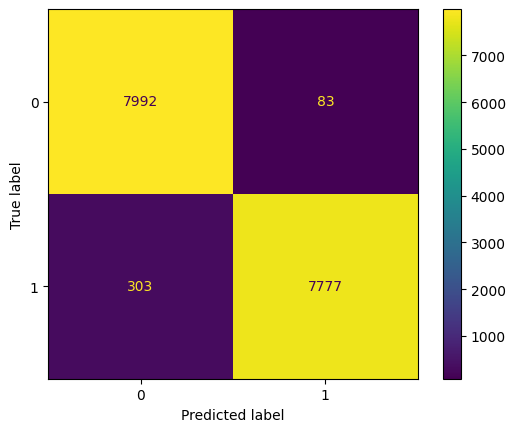

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, rfc_model.predict(X_test))

#### rfc2

In [ ]:
errors = []

for n in range(50,200, 4):
    rfc = RandomForestClassifier(n_estimators=n,bootstrap=True)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    errors.append(err)

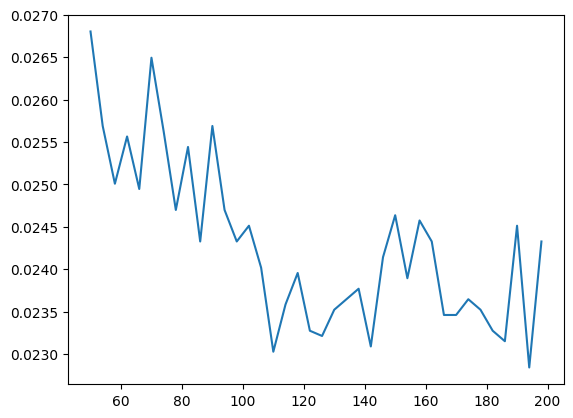

In [52]:
plt.plot(range(50,200, 4), errors)

In [78]:
1 - min(errors)

0.977158774373259

In [84]:
!pip install -U notebook-as-pdf

ERROR: Could not find a version that satisfies the requirement notebook-as-pdf (from versions: none)
ERROR: No matching distribution found for notebook-as-pdf
Note: you may need to restart the kernel to use updated packages.


In [83]:
!ls ../input/

clean-data  consumer-reviews-of-amazon-products


In [ ]:
ls ka